In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

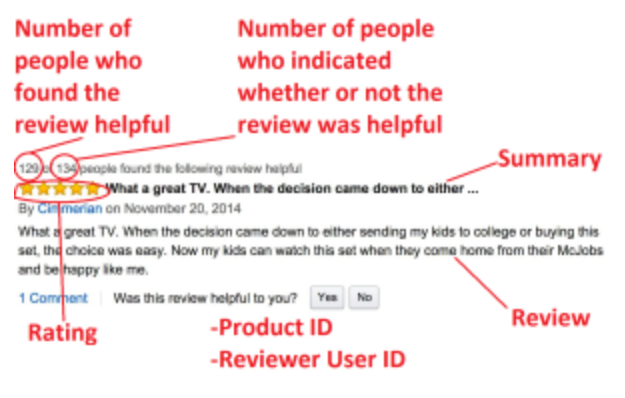

In [3]:
from IPython.display import Image
Image(filename=r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Amazon_reviews/Amazon_review.png') 

In [4]:
con= sqlite3.connect(r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Amazon_reviews/database.sqlite')

In [5]:
type(con)

sqlite3.Connection

In [6]:
df = pd.read_sql_query('SELECT * FROM REVIEWS', con)

In [7]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


<font color=blue, size=15 > Cleaning-Transforming the Data <font>

In [8]:
# Numerator column is for reviews found helpful
#denominator column is for reviews which are helpful or not
#so numerator is like a helpful subset of denominator, means should be smaller than denomitor

In [9]:
df_valid= df[df['HelpfulnessNumerator']<= df['HelpfulnessDenominator']]

In [10]:
df_valid.shape

(568452, 10)

In [11]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [12]:
data = df_valid.drop_duplicates(subset = ['UserId','ProfileName','Time','Text'])
data.shape

(393931, 10)

In [13]:
#setting the datetime data type for the time column

In [14]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [15]:
pd.to_datetime(data['Time']) #apparently not this one, I will try s

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [16]:
pd.to_datetime(data['Time'],unit='s')

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [17]:
data['Time'] = pd.to_datetime(data['Time'],unit='s')

/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_68617/3345079465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'],unit='s')


In [18]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [19]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


<font color=blue, size= 5> Top Shoppers <font>

In [20]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [21]:
shoppers = data.groupby(['UserId']).agg({'Text': 'count', 'Score':'mean', 'ProductId':'count'}).sort_values(by='ProductId', ascending = False)

In [22]:
shoppers

,Text,Score,ProductId
UserId,,,
AY12DBB0U420B,329,4.659574,329
A3OXHLG6DIBRW8,278,4.546763,278
A281NPSIMI1C2R,259,4.787645,259
A1YUL9PCJR3JTY,214,4.621495,214
A1Z54EM24Y40LL,211,4.383886,211
...,...,...,...
A2E80MDB9TCNGW,1,3.000000,1
A2E80RT3HOR35T,1,5.000000,1
A2E816C5N51F6X,1,5.000000,1


In [23]:
#top 10 shoppers
shoppers.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

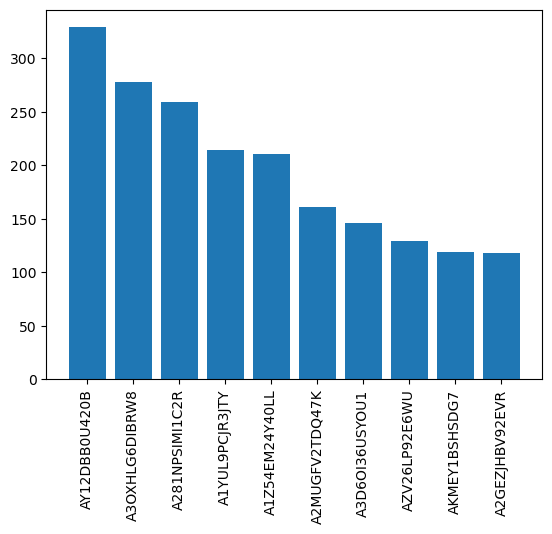

In [24]:
#top 10 shoppers count of purchase
plt.bar(shoppers.index[0:10], shoppers['ProductId'][0:10].values)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

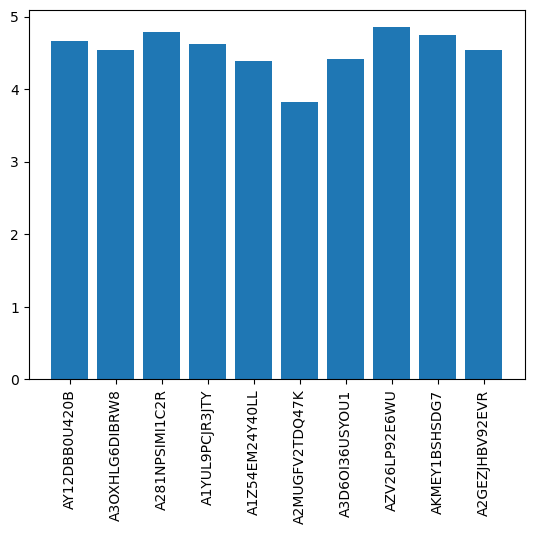

In [25]:
#top 10 shoppers average ratings
plt.bar(shoppers.index[0:10], shoppers['Score'][0:10].values)
plt.xticks(rotation='vertical')

<font color = blue, size= 5> Most sold products <font>

In [26]:
prod_count = data['ProductId'].value_counts().to_frame()

In [27]:
prod_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [28]:
prod_count_500 = prod_count[prod_count['ProductId']>500]

In [29]:
prod_count_500

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [30]:
prod_count_500_ids = prod_count_500.index

In [31]:
prod_count_500_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [32]:
#getting a df from those most sold(up to 500)
prod_500_df = data[data['ProductId'].isin(prod_count_500_ids)]

In [33]:
prod_500_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [34]:
prod_500_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='ProductId'>

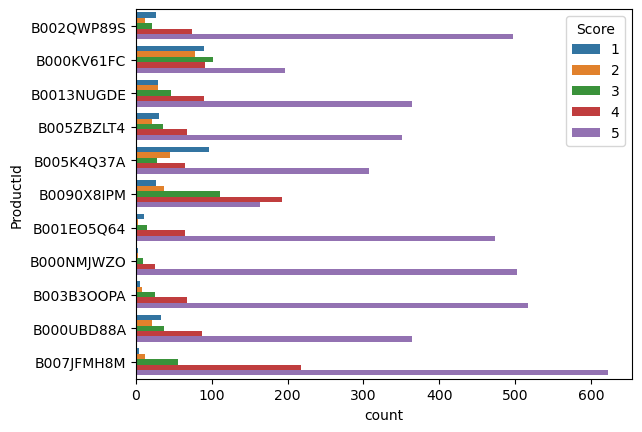

In [35]:
#top products rating vis
sns.countplot(y='ProductId', data =prod_500_df, hue='Score')

<font color=blue, size=5> Comparing review behaviours of frequent buyers and non frequent buyers<font>

In [36]:
#like which class is more likely to leave positive review about a product, 
#a frequent buyer or non frequent buyer

In [37]:
x = data['UserId'].value_counts()

In [38]:
x

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [39]:
#will call frequent whne they buy more than 50

In [40]:
data['viewer_type'] = data['UserId'].apply(lambda user:'Frequent' if x[user]>50 else 'Not frequent')

In [41]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not frequent
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not frequent


In [42]:
not_freq_df = data[data['viewer_type']== 'Not frequent']

In [43]:
freq_df = data[data['viewer_type']== 'Frequent']

In [44]:
not_freq_df['Score'].value_counts()

5    245196
4     54114
1     35957
3     28872
2     20434
Name: Score, dtype: int64

In [45]:
freq_df['Score'].value_counts()

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

<AxesSubplot:>

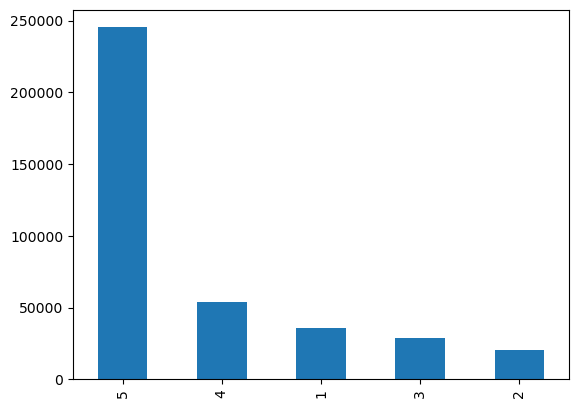

In [46]:
not_freq_df['Score'].value_counts().plot(kind='bar')

<AxesSubplot:>

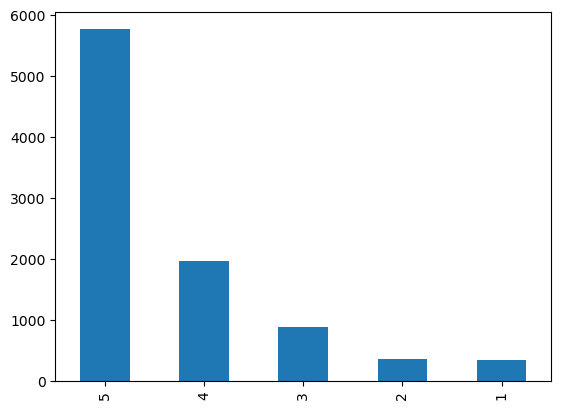

In [47]:
freq_df['Score'].value_counts().plot(kind='bar')

In [48]:
#apparently frequent buyers give less 5 star and less 1 star. 
#They are less likely to give extreme reviews.

In [49]:
#lets check the percentages

In [50]:
a= not_freq_df['Score'].value_counts()/len(not_freq_df)*100
a

5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: Score, dtype: float64

In [51]:
b = freq_df['Score'].value_counts()/len(freq_df)*100
b

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

<AxesSubplot:ylabel='Score'>

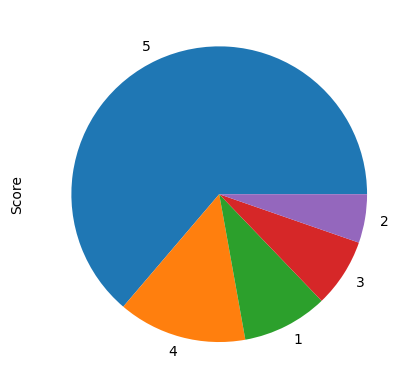

In [52]:
a.plot(kind='pie')

<AxesSubplot:ylabel='Score'>

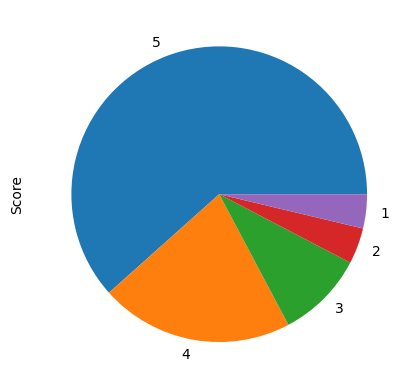

In [53]:
b.plot(kind='pie')

<font color= blue, size= 5> Are frequest buyers more verbose?<font>

In [54]:
#trying to count the text
data['Text'][0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [55]:
len(data['Text'][0].split(' '))

49

In [56]:
def calc_length(text):
    return len(text.split(' '))

In [57]:
data['text_length'] = data['Text'].apply(calc_length)

In [58]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not frequent,37


In [59]:
not_freq_data = data[data['viewer_type']== 'Not frequent']
freq_df_data = data[data['viewer_type']== 'Frequent']

(0.0, 300.0)

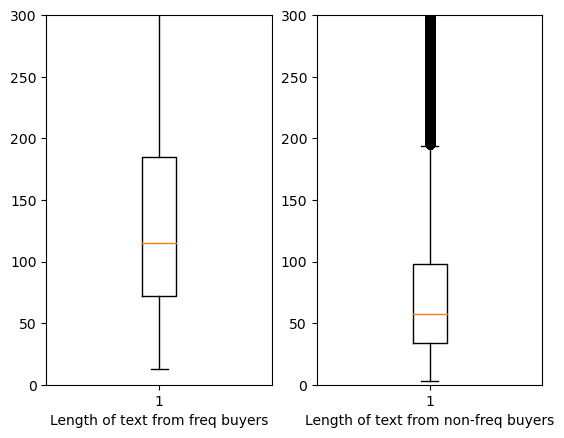

In [60]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.boxplot(freq_df_data['text_length'])
ax1.set_xlabel('Length of text from freq buyers')
ax1.set_ylim(0,300)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['text_length'])
ax2.set_xlabel('Length of text from non-freq buyers')
ax2.set_ylim(0,300)

In [61]:
#looks like frequent buyers leave longer comments compare to non frequent buyers.

<font color=blue, size=5> Sentiment Analysis <font>

In [62]:
#pip install textblob

In [63]:
from textblob import TextBlob

In [64]:
data['Summary'][0]

'Good Quality Dog Food'

In [65]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [66]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [67]:
TextBlob('I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.').sentiment.polarity

0.45

In [68]:
#ok,works, lets add polarity for all rows

In [69]:
polarity = []

for text in data['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [70]:
len(polarity)

393931

In [71]:
data['polarity']= polarity

In [72]:
negative = data[data['polarity']<0]
positive = data[data['polarity']>0]

In [73]:
from collections import Counter

In [74]:
Counter(negative['Summary']).most_common(10)

[('Disappointed', 426),
 ('Disappointing', 223),
 ('Not what I expected', 143),
 ('Awful', 120),
 ('disappointed', 120),
 ('Horrible', 111),
 ('Terrible', 107),
 ('Disgusting', 89),
 ('Not good', 78),
 ('Bland', 64)]

In [75]:
Counter(positive['Summary']).most_common(10)

[('Delicious!', 1768),
 ('Delicious', 1682),
 ('Great product', 765),
 ('Excellent', 713),
 ('Love it!', 649),
 ('Great Product', 648),
 ('Great!', 529),
 ('Great', 506),
 ('Awesome', 396),
 ('Awesome!', 394)]

In [76]:
#looks like disappointment is the main reason for negative review, 
#and tasty food is the main one for positive reviews

In [77]:
from wordcloud import WordCloud , STOPWORDS

In [78]:
from collections import Counter

In [79]:
all_rev = ' '.join(data['Text'])

In [81]:
word_cloud = WordCloud(stopwords = set(STOPWORDS),background_color="black", colormap= "mako").generate(all_rev)
word_cloud

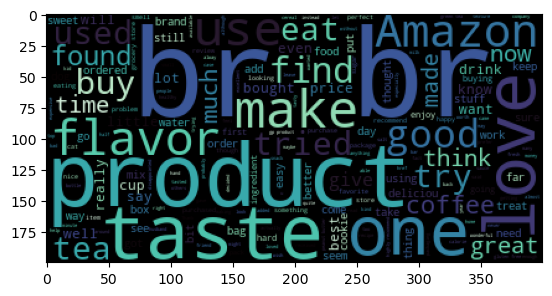

In [82]:
plt.imshow(word_cloud)